<a href="https://colab.research.google.com/github/pikey-msc/RiesgosFinancieros/blob/master/2020-1/R_SH_Acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Paso de carga de librerías en R de todas las que se utilizarán

In [0]:
#require(quantmod)
install.packages("quantmod")
library(quantmod)
#require(data.table)
install.packages("data.table")
library(data.table)
#require("PerformanceAnalytics")
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")

con = gzcon(url('https://github.com/systematicinvestor/SIT/raw/master/sit.gz', 'rb'))
source(con)
close(con)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘xts’, ‘zoo’, ‘TTR’

Loading required package: xts
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Loading required package: TTR
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Version 0.4-0 included new data defaults. See ?getSymbols.
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘data.table’

The following objects are masked from ‘package:xts’:

    first, last

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘quadprog’


Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

W

Cargamos parámetros para valoración:
	 
   **Pérdidas y Ganancias simulación histórica (sin alisado)**
   
	 Un enfoque más claro es suponer que tenemos:
1.   Una matriz $X_{(n+1)\times m}$ de $m$ factores de riesgo y $n+1$ observaciones. 
2.   Denotemos el vector de precios actual como $X_{00}:=(x_{0,1},x_{0,2},\ldots,x_{0,m})$. 
3.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
4.   Sea $r$ el número de instrumentos de un portafolio, entonces cada instrumento tiene una función de valuación $f_i\colon A_i \to R$ para todo $x\in X$, $i=1,\ldots, r$, donde $A_i\subset X_i$ con $\#(A_i)\leq \#(X_i)$.
5.   Sea $M_{1\times r}=(m_1,\ldots,m_r)$ el vector de posiciones nominales de cada instrumento, es decir, el número de contratos que se tienen por instrumento $m_i\in R$ $(i=1,\ldots,r)$.

In [0]:

#Cargar los símbolos de yahoo finance para EQ
Symbols<-c  ( "GCARSOA1.MX", "WALMEX.MX" )#tienen que ir en orden alfabético
pos_eq=c(1000,2000,-600) #monto inicial invertido en acciones
#Cargar los símbolos de yahoo finance para FX
SymbolsFX<-c("EURUSD=X","GBPUSD=X","USDMXN=X" ) #tienen que ir en orden alfabético
pos_fx=c(1000,-500,200) #monto inicial invertido en divisas
nh=3660 #días de historia

pos=cbind(t(pos_fx),t(pos_eq))


Ahora definimos el "*environment*"

In [0]:
start_date=Sys.Date()-nh #fecha inicial

#Creación del objeto para guardar los datos
dataEnv<-new.env()
dataEnvFX<-new.env()

#obtener los datos
getSymbols.yahoo(Symbols,env=dataEnv,from=start_date)
getSymbols.yahoo(SymbolsFX,env=dataEnvFX,from=start_date)

#muestra
tail(dataEnvFX$`GBPUSD=X`)



Warning message:
“GCARSOA1.MX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“WALMEX.MX contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "GCARSOA1.MX" "WALMEX.MX"

Warning message:
“EURUSD=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“GBPUSD=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”Warning message:
“USDMXN=X contains missing values. Some functions will not work if objects contain missing values in the middle of the series. Consider using na.omit(), na.approx(), na.fill(), etc to remove or replace them.”

[1] "EURUSD=X" "GBPUSD=X" "USDMXN=X"

           GBPUSD=X.Open GBPUSD=X.High GBPUSD=X.Low GBPUSD=X.Close
2019-08-09      1.214477      1.214772     1.205734       1.214373
2019-08-12      1.202198      1.210068     1.201923       1.202198
2019-08-13      1.208021      1.209760     1.204355       1.207875
2019-08-14      1.206418      1.209995     1.204674       1.206418
2019-08-15      1.206040      1.214255     1.205110       1.206040
2019-08-16      1.209219      1.217730     1.208313       1.209161
           GBPUSD=X.Volume GBPUSD=X.Adjusted
2019-08-09               0          1.214373
2019-08-12               0          1.202198
2019-08-13               0          1.207875
2019-08-14               0          1.206418
2019-08-15               0          1.206040
2019-08-16               0          1.209161

Limpiamos NA's y nos quedamos con los precios de cierre

In [0]:
#limpiarlos, alinearnos y quedarnos con el precio de cierre 

bt.prep(dataEnv,align='remove.na',fill.gaps = T)
bt.prep(dataEnvFX,align='remove.na',fill.gaps=T)

#muestra de datos
head(dataEnv$prices)
head(dataEnvFX$prices)

#muestra de datos
head(dataEnv$prices)
head(dataEnvFX$prices)


#Nos quedamos con los precios
stock_prices = dataEnv$prices
tail(stock_prices[,])



stock_pricesFX=dataEnvFX$prices
tail(stock_pricesFX)
#cambiar todo a pesos mexicanos
stock_pricesFX=cbind(stock_pricesFX[,1,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,2,with=F]*stock_pricesFX[,3,with=F],stock_pricesFX[,3,with=F])
tail(stock_pricesFX)

stock_prices_EQFX=merge(stock_pricesFX,stock_prices,join = "inner")
stock_prices_EQFX
tail(stock_prices_EQFX)


#Preciso actuales
#x0=as.data.table(as.matrix(stock_prices_EQFX[nrow(stock_prices_EQFX),])) #valores actuales
x0=stock_prices_EQFX[nrow(stock_prices_EQFX),]
x0


           GCARSOA1.MX WALMEX.MX
2009-07-24     19.2530    21.640
2009-07-27     19.8494    21.930
2009-07-28     20.2797    21.970
2009-07-29     19.9619    21.785
2009-07-30     20.4850    21.920
2009-07-31     21.0228    22.510

           EURUSD=X GBPUSD=X USDMXN=X
2009-07-24 1.421202 1.644710  13.1800
2009-07-27 1.424704 1.648533  13.2642
2009-07-28 1.414607 1.641093  13.2195
2009-07-29 1.401463 1.635109  13.2525
2009-07-30 1.408490 1.650792  13.2522
2009-07-31 1.426005 1.670509  13.1490

Plotting works too:

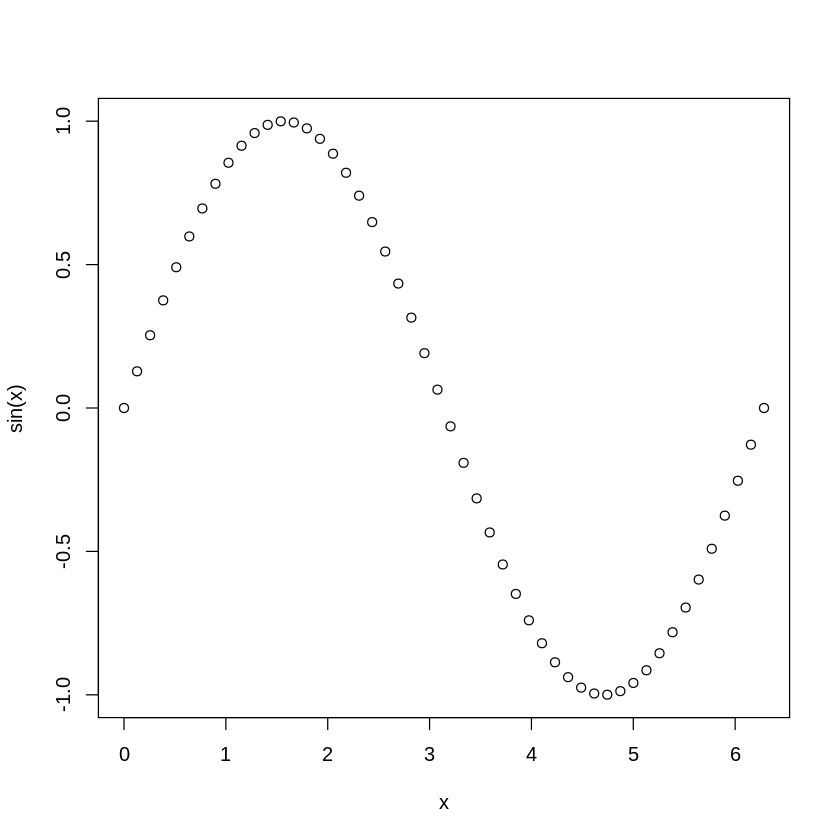

In [0]:
x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))